In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train=train.drop(['Survived'], axis=1)

In [9]:
passengers=train.append(test)

In [11]:
passengers['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 1309, dtype: int64

In [12]:
title_map = {'Mr':0, 'Miss':1, 'Mrs':1, 'Lady':1, 'Ms':1, 'Countess':1,
           'Master':2, 'Dr':2, 'Rev':2, 'Major':2, 'Mile':2, 'Col':2, 
           'Jonkheer':2, 'Sir':2, 'Mme':2, 'Don':2}

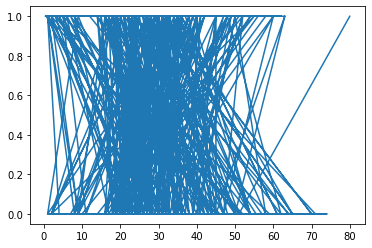

In [29]:
plt.plot(train['Age'], train['Survived'] )

In [16]:
max(train['Age'])

80.0

In [17]:
min(train['Age'])

0.42

In [5]:
Age_Sur=train[['Age', 'Survived']]

In [48]:
Age_Sur

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [50]:
Age_Sur=Age_Sur.dropna()

In [53]:
Age_Sur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  714 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


In [55]:
is_under_1=Age_Sur['Age']<=1

In [58]:
r0_1=Age_Sur[is_under_1]

In [59]:
len(r0_1)

14

In [66]:
sur_rate0_1=r0_1['Survived'].sum()/len(r0_1)

In [110]:
x=[]
for i in range(0,80,5):
    x.append('{}~{}'.format(i,i+5))

In [103]:
y=[]
for i in range(16):
    under=Age_Sur['Age']<=i+5
    over=Age_Sur['Age']>i
    temp=Age_Sur[under & over]
    y.append(temp['Survived'].sum()/len(temp))

In [104]:
y

[0.7045454545454546,
 0.6363636363636364,
 0.7307692307692307,
 0.6666666666666666,
 0.5,
 0.35,
 0.2857142857142857,
 0.3157894736842105,
 0.35294117647058826,
 0.4666666666666667,
 0.5789473684210527,
 0.5,
 0.4772727272727273,
 0.4117647058823529,
 0.39080459770114945,
 0.34375]

In [73]:
over=Age_Sur['Age']>1

In [74]:
over

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: Age, Length: 714, dtype: bool

In [101]:
y=[]
under=Age_Sur['Age']<=10
over=Age_Sur['Age']>9
temp=Age_Sur[under & over]
y.append(temp['Survived'].sum()/len(temp))

In [102]:
y

[0.0]

In [77]:
temp['Survived'].sum()/len(temp)

0.5

In [96]:
len(temp)

10

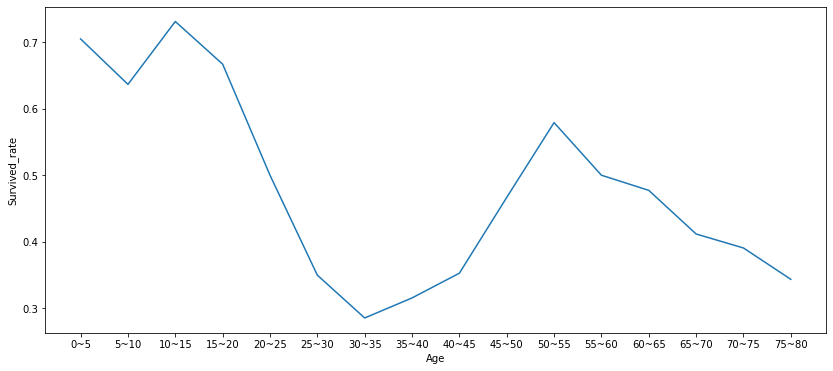

In [113]:
plt.figure(figsize=(14,6))
plt.xlabel('Age')
plt.ylabel('Survived_rate')
plt.plot(x,y)

In [ ]:
# plot 시각화 함수
def SR_plot(feature):
    Age_Sur=train[[feature, 'Survived']]

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

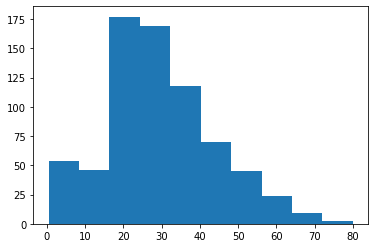

In [6]:
plt.hist(Age_Sur['Age'])